## KNN e Árvore de Regressão

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de K-vizinhos mais próximos (KNN) e Árvore de Regressão.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [76]:
import analise_residuos as ar
import importlib
importlib.reload(ar)

import analise_exploratoria as ae
import importlib
importlib.reload(ae)

<module 'analise_exploratoria' from 'C:\\Users\\lazaropd\\hub_ia\\ai-residency\\Módulo 2 - Data Analysis\\Curso 4 - Regressão\\analise_exploratoria.py'>

In [35]:
import pandas as pd

dados_adv = pd.read_csv('dataset/Advertising.csv', index_col=0)

dados_por = pd.read_csv('dataset/Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

O algoritmo KNN é implementado pela classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNeighborsRegressor</a>:

In [36]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2, weights='uniform')
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Aqui, o algoritmo é configurado com K = 2 e o peso de cada instância é definido uniformemente.

O "formato" do modelo aprendido pelo KNN é bem diferente do aprendido pela regressão linear:

Text(0, 0.5, 'Preço')

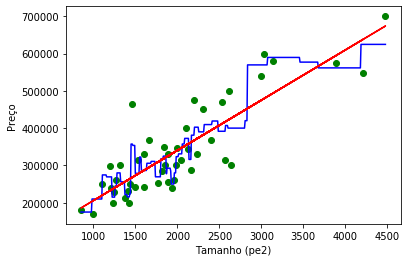

In [37]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np

linear = LinearRegression().fit(X, y)

T = np.linspace(min(X.values.ravel()),max(X.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh.predict(T)

plt.scatter(X, y, color='g')
plt.plot(T, y_, color='b')
plt.plot(X, linear.predict(X), color='r')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

A parametrização K e o peso das instâncias podem ser alteradas no momento da instanciação do objeto, por exemplo:
    
```python
    neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform') # K = 3, peso uniforme
    neigh = KNeighborsRegressor(n_neighbors=2,weights='distance') # K = 2, peso baseado na distância
```    

## Exercício 1

Para as duas bases de treinamento de regressão (<i>Advertising</i> e <i>Portland_housePrices</i>), avalie quais são as melhores parametrizações (use inspeção visual e RSS/R^2).
    
    

***********************************************
Dados extraídos com sucesso
X:  TV | radio | newspaper
y:  sales
M:  (200, 3) | (200, 1)
***********************************************


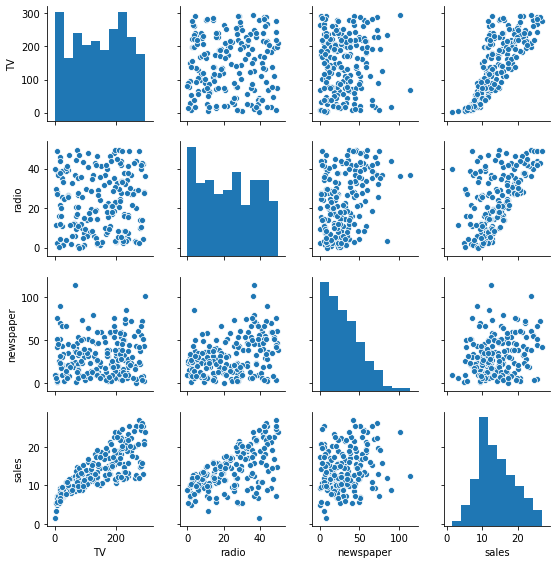

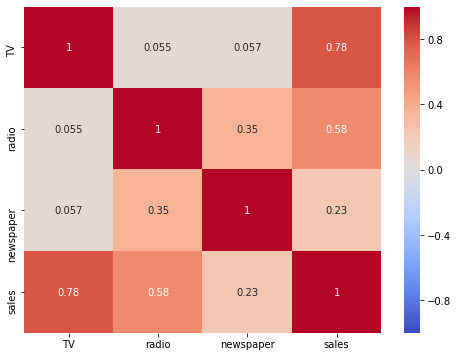

In [38]:
df = dados_adv

y_cols = ['sales']
ig_cols = []

X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, True)

***********************************************
Dados extraídos com sucesso
X:  TV | radio | newspaper
y:  sales
M:  (200, 3) | (200, 1)
***********************************************


***********************************************
k:  2
***********************************************
X:  TV  |  ['sales']
***********************************************
Número de observações:  200
RSS: 1053.62
R2: 0.75
***********************************************



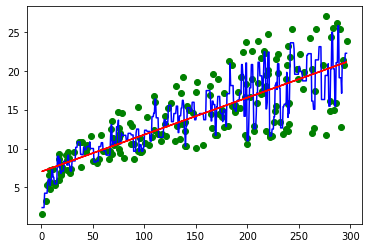



***********************************************
k:  2
***********************************************
X:  radio  |  ['sales']
***********************************************
Número de observações:  200
RSS: 1822.70
R2: 0.50
***********************************************



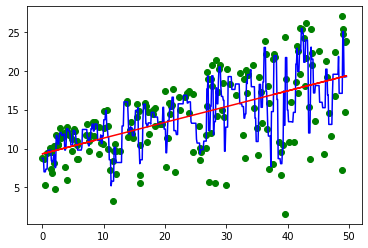



***********************************************
k:  2
***********************************************
X:  newspaper  |  ['sales']
***********************************************
Número de observações:  200
RSS: 2491.68
R2: 0.09
***********************************************



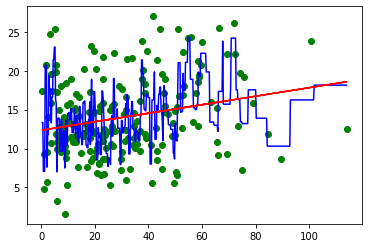



***********************************************
k:  3
***********************************************
X:  TV  |  ['sales']
***********************************************
Número de observações:  200
RSS: 1308.37
R2: 0.67
***********************************************



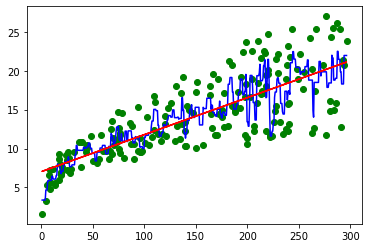



***********************************************
k:  3
***********************************************
X:  radio  |  ['sales']
***********************************************
Número de observações:  200
RSS: 2363.86
R2: 0.29
***********************************************



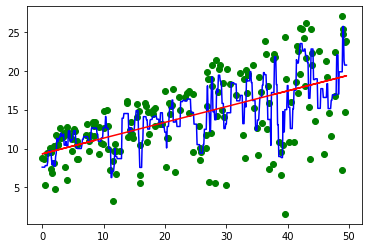



***********************************************
k:  3
***********************************************
X:  newspaper  |  ['sales']
***********************************************
Número de observações:  200
RSS: 3220.00
R2: -0.76
***********************************************



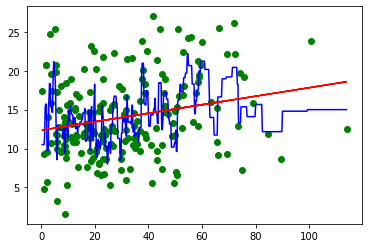



***********************************************
k:  4
***********************************************
X:  TV  |  ['sales']
***********************************************
Número de observações:  200
RSS: 1640.83
R2: 0.53
***********************************************



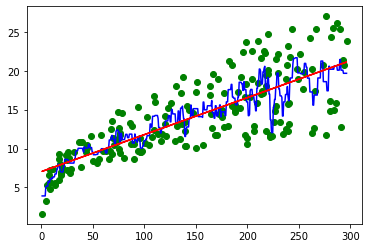



***********************************************
k:  4
***********************************************
X:  radio  |  ['sales']
***********************************************
Número de observações:  200
RSS: 2680.27
R2: 0.08
***********************************************



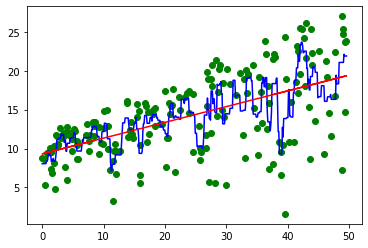



***********************************************
k:  4
***********************************************
X:  newspaper  |  ['sales']
***********************************************
Número de observações:  200
RSS: 3886.92
R2: -1.80
***********************************************



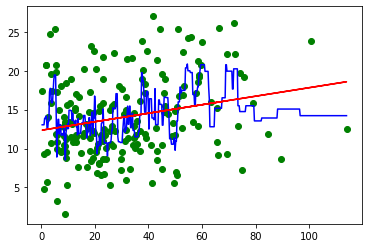



***********************************************
k:  5
***********************************************
X:  TV  |  ['sales']
***********************************************
Número de observações:  200
RSS: 1827.24
R2: 0.48
***********************************************



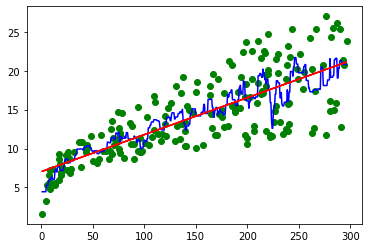



***********************************************
k:  5
***********************************************
X:  radio  |  ['sales']
***********************************************
Número de observações:  200
RSS: 2839.08
R2: -0.10
***********************************************



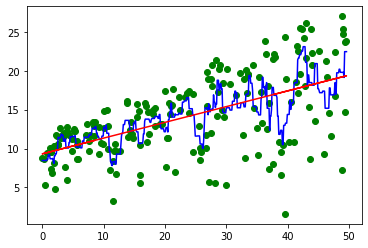



***********************************************
k:  5
***********************************************
X:  newspaper  |  ['sales']
***********************************************
Número de observações:  200
RSS: 4335.62
R2: -2.60
***********************************************



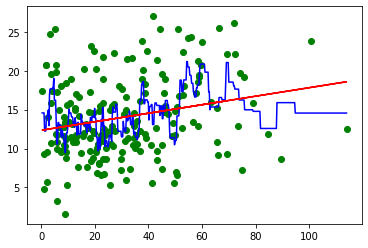

In [50]:
from sklearn.neighbors import KNeighborsRegressor

df = dados_adv

y_cols = ['sales']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

for k in range(2, 6):
    for x_col in X.columns:
        print('\n***********************************************')
        print('k: ', k)
        print('***********************************************')
        print('X: ', x_col, ' | ', y.columns.values)
        x = X[[x_col]]
        neigh = KNeighborsRegressor(n_neighbors=k, weights='uniform')
        neigh.fit(x, y)
        y_hat = neigh.predict(x)
        ar.analise_residuos(y, y_hat, False)

        T = np.linspace(min(x.values.ravel()),max(x.values.ravel()), 500 )[:, np.newaxis]
        y_ = neigh.predict(T)    

        linear = LinearRegression().fit(x, y).predict(x)

        plt.scatter(x, y, color='g')
        plt.plot(T, y_, color='b')
        plt.plot(x, linear, color='r')
        plt.show()

***********************************************
Dados extraídos com sucesso
X:  tamanho | quartos
y:  preco
M:  (47, 2) | (47, 1)
***********************************************

***********************************************
k:  2
***********************************************
X:  tamanho  |  ['preco']
***********************************************
Número de observações:  47
RSS: 114628254603.75
R2: 0.81
***********************************************



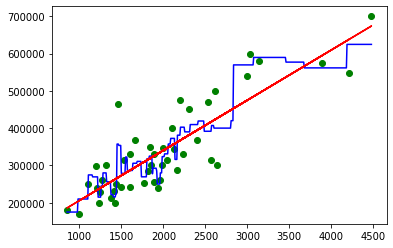


***********************************************
k:  2
***********************************************
X:  quartos  |  ['preco']
***********************************************
Número de observações:  47
RSS: 586494388507.00
R2: -2.06
***********************************************



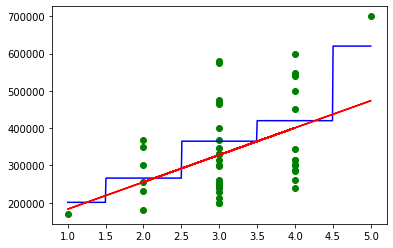


***********************************************
k:  3
***********************************************
X:  tamanho  |  ['preco']
***********************************************
Número de observações:  47
RSS: 152012621649.56
R2: 0.75
***********************************************



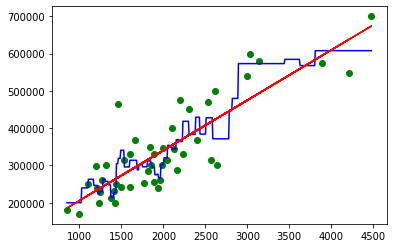


***********************************************
k:  3
***********************************************
X:  quartos  |  ['preco']
***********************************************
Número de observações:  47
RSS: 600552982384.33
R2: -5.38
***********************************************



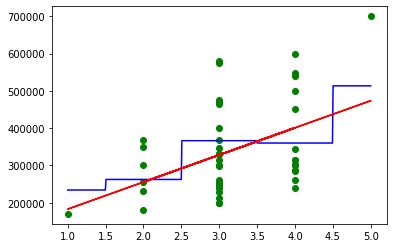


***********************************************
k:  4
***********************************************
X:  tamanho  |  ['preco']
***********************************************
Número de observações:  47
RSS: 178023966617.06
R2: 0.62
***********************************************



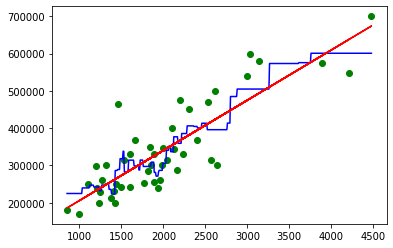


***********************************************
k:  4
***********************************************
X:  quartos  |  ['preco']
***********************************************
Número de observações:  47
RSS: 603999757918.94
R2: -8.75
***********************************************



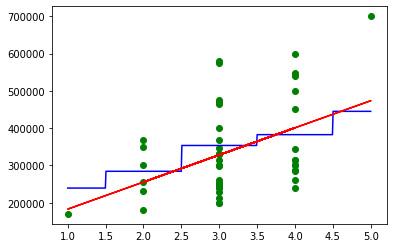


***********************************************
k:  5
***********************************************
X:  tamanho  |  ['preco']
***********************************************
Número de observações:  47
RSS: 171711455581.56
R2: 0.62
***********************************************



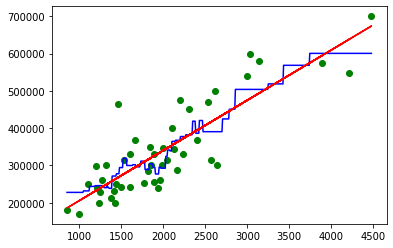


***********************************************
k:  5
***********************************************
X:  quartos  |  ['preco']
***********************************************
Número de observações:  47
RSS: 602568589408.68
R2: -5.46
***********************************************



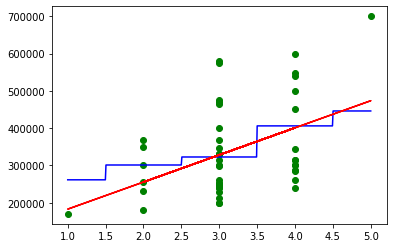

In [52]:
from sklearn.neighbors import KNeighborsRegressor

df = dados_por

y_cols = ['preco']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

for k in range(2, 6):
    for x_col in X.columns:
        print('\n***********************************************')
        print('k: ', k)
        print('***********************************************')
        print('X: ', x_col, ' | ', y.columns.values)
        x = X[[x_col]]
        neigh = KNeighborsRegressor(n_neighbors=k, weights='uniform')
        neigh.fit(x, y)
        y_hat = neigh.predict(x)
        ar.analise_residuos(y, y_hat, False)

        T = np.linspace(min(x.values.ravel()),max(x.values.ravel()), 500 )[:, np.newaxis]
        y_ = neigh.predict(T)    

        linear = LinearRegression().fit(x, y).predict(x)

        plt.scatter(x, y, color='g')
        plt.plot(T, y_, color='b')
        plt.plot(x, linear, color='r')
        plt.show()

## Árvore de Regressão

A árvore de decisão é implementada através da classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor</a>.


In [58]:
from sklearn.tree import DecisionTreeRegressor  
tree = DecisionTreeRegressor()  

df = dados_adv

y_cols = ['sales']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

x = X[['TV']]
# fit the regressor with X and Y data 
tree.fit(x, y) 

***********************************************
Dados extraídos com sucesso
X:  TV | radio | newspaper
y:  sales
M:  (200, 3) | (200, 1)
***********************************************


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Text(0, 0.5, 'Preço')

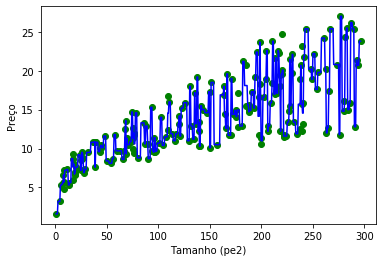

In [60]:
T = np.linspace(min(x.values.ravel()),max(x.values.ravel()), 500 )[:, np.newaxis]

plt.scatter(x, y,color='g')
y_t = tree.predict(T)
plt.plot(T, y_t,color='b')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

É possível também gerar a árvore resultante para visualização:

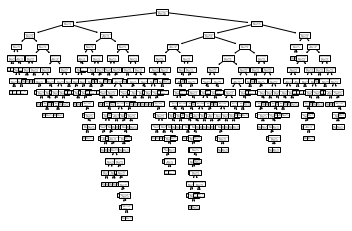

In [63]:
from sklearn.tree import plot_tree   

aux = plot_tree(tree, feature_names=['Tamanho'])

Este código irá gerar um arquivo <b>tree.dot</b>.

Esse arquivo pode ser visualizado no site <a href='http://www.webgraphviz.com/'>http://www.webgraphviz.com</a>

## Exercício 2

Qual seria o melhor método para montar um modelo em cada uma das bases com Árvore de Decisão?

Utilizar apenas um atributo? multiplos? quais seriam?

In [64]:
from sklearn.tree import DecisionTreeRegressor  
tree = DecisionTreeRegressor() 

In [ ]:
import analise_residuos as ar
import importlib
importlib.reload(ar)

import analise_exploratoria as ae
import importlib
importlib.reload(ae)

***********************************************
Dados extraídos com sucesso
X:  TV | radio | newspaper
y:  sales
M:  (200, 3) | (200, 1)
***********************************************

***********************************************
X:  TV  |  ['sales']
***********************************************
Número de observações:  200
RSS: 77.14
R2: 0.99
***********************************************



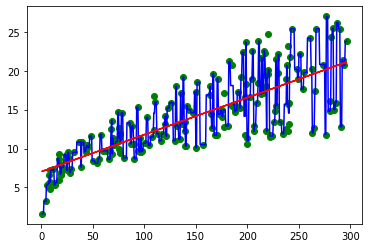


***********************************************
X:  radio  |  ['sales']
***********************************************
Número de observações:  200
RSS: 720.98
R2: 0.85
***********************************************



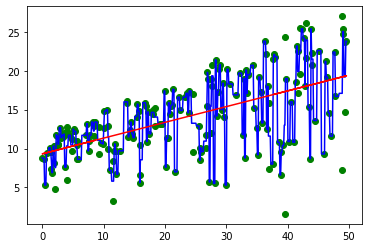


***********************************************
X:  newspaper  |  ['sales']
***********************************************
Número de observações:  200
RSS: 598.20
R2: 0.88
***********************************************



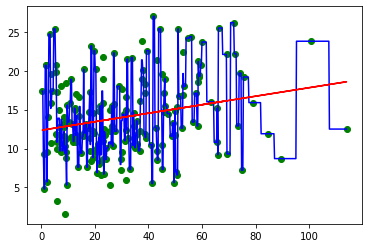

In [79]:
df = dados_adv

y_cols = ['sales']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

for x_col in X.columns:
    print('\n***********************************************')
    print('X: ', x_col, ' | ', y.columns.values)
    x = X[[x_col]]
    tree.fit(x, y)
    y_hat = tree.predict(x)
    ar.analise_residuos(y, y_hat, False)

    T = np.linspace(min(x.values.ravel()),max(x.values.ravel()), 500 )[:, np.newaxis]
    y_ = tree.predict(T)    

    linear = LinearRegression().fit(x, y).predict(x)

    plt.scatter(x, y, color='g')
    plt.plot(T, y_, color='b')
    plt.plot(x, linear, color='r')
    plt.show()

***********************************************
Dados extraídos com sucesso
X:  tamanho | quartos
y:  preco
M:  (47, 2) | (47, 1)
***********************************************

***********************************************
X:  tamanho  |  ['preco']
***********************************************
Número de observações:  47
RSS: 0.00
R2: 1.00
***********************************************



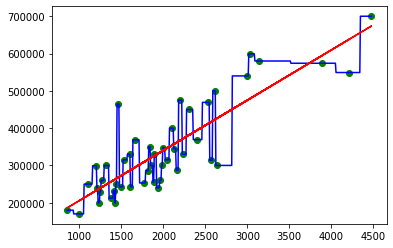


***********************************************
X:  quartos  |  ['preco']
***********************************************
Número de observações:  47
RSS: 515518250255.53
R2: -1.53
***********************************************



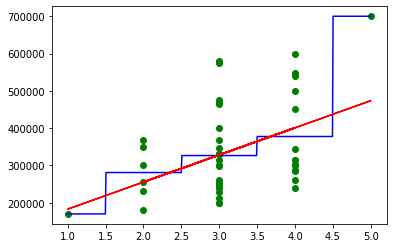

In [80]:
df = dados_por

y_cols = ['preco']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

for x_col in X.columns:
    print('\n***********************************************')
    print('X: ', x_col, ' | ', y.columns.values)
    x = X[[x_col]]
    tree.fit(x, y)
    y_hat = tree.predict(x)
    ar.analise_residuos(y, y_hat, False)

    T = np.linspace(min(x.values.ravel()),max(x.values.ravel()), 500 )[:, np.newaxis]
    y_ = tree.predict(T)    

    linear = LinearRegression().fit(x, y).predict(x)

    plt.scatter(x, y, color='g')
    plt.plot(T, y_, color='b')
    plt.plot(x, linear, color='r')
    plt.show()

In [82]:
from sklearn.metrics import r2_score
def calc_rss(y, predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted, y)

In [83]:
from sklearn.tree import DecisionTreeRegressor  
tree = DecisionTreeRegressor() 

X_tv = dados_adv.loc[:,['TV']]
X_ra = dados_adv.loc[:,['radio']]
X_ne = dados_adv.loc[:,['newspaper']]
X_tv_ra = dados_adv.loc[:,['TV','radio']]
X_tv_ne = dados_adv.loc[:,['TV','newspaper']]
X_ra_ne = dados_adv.loc[:,['radio','newspaper']]
X_all = dados_adv.loc[:,['TV','radio','newspaper']]

y_adv = dados_adv.loc[:,['sales']]

model = tree.fit(X_tv,y_adv)
r2_tv = calc_r2(y_adv,model.predict(X_tv))

model = tree.fit(X_ra,y_adv)
r2_ra = calc_r2(y_adv,model.predict(X_ra))

model = tree.fit(X_ne,y_adv)
r2_ne = calc_r2(y_adv,model.predict(X_ne))

model = tree.fit(X_tv_ra,y_adv)
r2_tv_ra = calc_r2(y_adv,model.predict(X_tv_ra))

model = tree.fit(X_tv_ne,y_adv)
r2_tv_ne = calc_r2(y_adv,model.predict(X_tv_ne))

model = tree.fit(X_ra_ne,y_adv)
r2_ra_ne = calc_r2(y_adv,model.predict(X_ra_ne))

model = tree.fit(X_all,y_adv)
r2_all = calc_r2(y_adv,model.predict(X_all))

print("R^2 de acordo com os atributos")
print("TV:         " + str(r2_tv))
print("Radio:      " + str(r2_ra))
print("Newspaper:  " + str(r2_ne))
print("TV + Rad:   " + str(r2_tv_ra))
print("TV + News:  " + str(r2_tv_ne))
print("Rad + News: " + str(r2_ra_ne))
print("Todos:      " + str(r2_all))

R^2 de acordo com os atributos
TV:         0.985554330786443
Radio:      0.8464752618911384
Newspaper:  0.8758658197213519
TV + Rad:   1.0
TV + News:  1.0
Rad + News: 1.0
Todos:      1.0


## Comparação entre modelos

Agora já sabemos como implementar um modelo linear multivariado:

```python
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X,y)
```

como implementar o regressor KNN:

```python
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor().fit(X,y)
```

e como implementar uma árvore de regressão:

```python
from sklearn.tree import DecisionTreeRegressor  
tree = DecisionTreeRegressor().fit(X,y)
```

Conhecemos todos os algoritmos e seus parâmetros, agora como decidir <b>qual</b> deles usar efetivamente? Olhar o <i>fitting</i> em sua base de dados e tomar isso como verdade absoluta pode ser completamente enganoso.

Podemos tentar <i>aliviar</i> esse problema fazendo uma comparação mais inteligente

## Exercício 3

1) Separe as bases <i>Portland_housePrices</i> e <i>Advertising</i> em conjuntos de <i>treinamento</i> e <i>teste</i> (30% das instâncias para teste e 70% para treinamento).

2) Utilize as bases de treinamento para treinar os modelos a serem avaliados, e as bases de teste para avaliar o desempenho regressor dos modelos.

3) Qual é o melhor modelo para cada problema? Por que você fez essa recomendação? (mostre métricas, gráficos, ou as evidências que julgar necessárias).

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# carregar dados do dataframe escolhido
df = dados_por
y_cols = ['preco']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

# repetir para cada coluna do dataframe (univariado)
for x_col in X.columns:
    print('\n***********************************************')
    print('X: ', x_col, ' | ', y_train.columns.values)
    
    # separar a base de treino e de teste
    X_train, X_test, y_train, y_test = train_test_split(X[[x_col]], y, test_size=0.20)

    # normalizar o X de treino e aplicar o modelo de normalização aos dados de teste
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    x_train = X_train_std
    x_test = X_test_std
    
    print('***********************************************\nLinear')
    linear = LinearRegression().fit(x_train, y_train)
    y_hat_linear = linear.predict(x_test)
    ar.analise_residuos(y_test, y_hat_linear, False)

    print('***********************************************\nKNN')
    for k in range(2, 10):
        neigh = KNeighborsRegressor(n_neighbors=k, weights='uniform').fit(x_train, y_train)
        y_hat_neigh = neigh.predict(x_test)
        print('k: ', k)
        print('***********************************************')
        ar.analise_residuos(y_test, y_hat_neigh, False)

    print('***********************************************\nTree')
    tree = DecisionTreeRegressor().fit(x_train, y_train)
    y_hat_tree = tree.predict(x_test)
    ar.analise_residuos(y_test, y_hat_tree, False)

***********************************************
Dados extraídos com sucesso
X:  tamanho | quartos
y:  preco
M:  (47, 2) | (47, 1)
***********************************************

***********************************************
X:  tamanho  |  ['preco']
***********************************************
Linear
***********************************************
Número de observações:  10
RSS: 3259376067090.32
R2: 0.81
***********************************************

***********************************************
KNN
k:  2
***********************************************
***********************************************
Número de observações:  10
RSS: 3576094340011.50
R2: 0.84
***********************************************

k:  3
***********************************************
***********************************************
Número de observações:  10
RSS: 3070373426321.56
R2: 0.66
***********************************************

k:  4
***********************************************
*************

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# carregar dados do dataframe escolhido
df = dados_adv
y_cols = ['sales']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

# repetir para cada coluna do dataframe (univariado)
for x_col in X.columns:
    print('\n***********************************************')
    print('X: ', x_col, ' | ', y_train.columns.values)
    
    # separar a base de treino e de teste
    X_train, X_test, y_train, y_test = train_test_split(X[[x_col]], y, test_size=0.20)

    # normalizar o X de treino e aplicar o modelo de normalização aos dados de teste
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    x_train = X_train_std
    x_test = X_test_std
    
    print('***********************************************\nLinear')
    linear = LinearRegression().fit(x_train, y_train)
    y_hat_linear = linear.predict(x_test)
    ar.analise_residuos(y_test, y_hat_linear, False)

    print('***********************************************\nKNN')
    for k in range(2, 10):
        neigh = KNeighborsRegressor(n_neighbors=k, weights='uniform').fit(x_train, y_train)
        y_hat_neigh = neigh.predict(x_test)
        print('k: ', k)
        print('***********************************************')
        ar.analise_residuos(y_test, y_hat_neigh, False)

    print('***********************************************\nTree')
    tree = DecisionTreeRegressor().fit(x_train, y_train)
    y_hat_tree = tree.predict(x_test)
    ar.analise_residuos(y_test, y_hat_tree, False)

***********************************************
Dados extraídos com sucesso
X:  TV | radio | newspaper
y:  sales
M:  (200, 3) | (200, 1)
***********************************************

***********************************************
X:  TV  |  ['preco']
***********************************************
Linear
***********************************************
Número de observações:  40
RSS: 68837.51
R2: 0.40
***********************************************

***********************************************
KNN
k:  2
***********************************************
***********************************************
Número de observações:  40
RSS: 71011.60
R2: 0.30
***********************************************

k:  3
***********************************************
***********************************************
Número de observações:  40
RSS: 69807.53
R2: 0.35
***********************************************

k:  4
***********************************************
***********************************

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# carregar dados do dataframe escolhido
df = dados_por
y_cols = ['preco']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

# separar a base de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# normalizar o X de treino e aplicar o modelo de normalização aos dados de teste
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

x_train = X_train_std
x_test = X_test_std

print('***********************************************\nLinear')
linear = LinearRegression().fit(x_train, y_train)
y_hat_linear = linear.predict(x_test)
ar.analise_residuos(y_test, y_hat_linear, False)

print('***********************************************\nKNN')
for k in range(2, 10):
    neigh = KNeighborsRegressor(n_neighbors=k, weights='uniform').fit(x_train, y_train)
    y_hat_neigh = neigh.predict(x_test)
    print('k: ', k)
    print('***********************************************')
    ar.analise_residuos(y_test, y_hat_neigh, False)

print('***********************************************\nTree')
tree = DecisionTreeRegressor().fit(x_train, y_train)
y_hat_tree = tree.predict(x_test)
ar.analise_residuos(y_test, y_hat_tree, False)

***********************************************
Dados extraídos com sucesso
X:  tamanho | quartos
y:  preco
M:  (47, 2) | (47, 1)
***********************************************
***********************************************
Linear
***********************************************
Número de observações:  10
RSS: 2324335062175.28
R2: 0.66
***********************************************

***********************************************
KNN
k:  2
***********************************************
***********************************************
Número de observações:  10
RSS: 2443636729820.00
R2: 0.35
***********************************************

k:  3
***********************************************
***********************************************
Número de observações:  10
RSS: 2085650564542.22
R2: -0.36
***********************************************

k:  4
***********************************************
***********************************************
Número de observações:  10
RSS: 2057725

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# carregar dados do dataframe escolhido
df = dados_adv
y_cols = ['sales']
ig_cols = []
X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

# separar a base de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# normalizar o X de treino e aplicar o modelo de normalização aos dados de teste
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

x_train = X_train_std
x_test = X_test_std

print('***********************************************\nLinear')
linear = LinearRegression().fit(x_train, y_train)
y_hat_linear = linear.predict(x_test)
ar.analise_residuos(y_test, y_hat_linear, False)

print('***********************************************\nKNN')
for k in range(2, 10):
    neigh = KNeighborsRegressor(n_neighbors=k, weights='uniform').fit(x_train, y_train)
    y_hat_neigh = neigh.predict(x_test)
    print('k: ', k)
    print('***********************************************')
    ar.analise_residuos(y_test, y_hat_neigh, False)

print('***********************************************\nTree')
tree = DecisionTreeRegressor().fit(x_train, y_train)
y_hat_tree = tree.predict(x_test)
ar.analise_residuos(y_test, y_hat_tree, False)

***********************************************
Dados extraídos com sucesso
X:  TV | radio | newspaper
y:  sales
M:  (200, 3) | (200, 1)
***********************************************
***********************************************
Linear
***********************************************
Número de observações:  60
RSS: 181101.06
R2: 0.92
***********************************************

***********************************************
KNN
k:  2
***********************************************
***********************************************
Número de observações:  60
RSS: 181072.75
R2: 0.91
***********************************************

k:  3
***********************************************
***********************************************
Número de observações:  60
RSS: 180339.47
R2: 0.90
***********************************************

k:  4
***********************************************
***********************************************
Número de observações:  60
RSS: 175889.70
R2: 0.90
***